### 注意
- BP算法是神经网络深度学习中最重要的算法之一，了解 BP 算法可以让我们更理解神经网络深度学习模型优化训练的本质，属于内功修行的基础内容。
- 不过作为初学者我们也要学会量力而行，BP 算法的推导对于初学者来说我觉得可以作为选学的知识，也就是可学可不学。我们大概知道它是神经网络深度学习的核心优化算法即可，并不会影响到我们对后面知识的学习，也不会影响到我们写程序做应用。我们在学习的过程中如果遇到困难，不要被它卡住，可以先暂时放一放，等自身积累足够多之后再回过头来看之前遇到的问题，或许就可以迎刃而解了。

### 简介
- BP神经网络是一种按照误差逆向传播算法训练的多层前馈神经网络，它是20世纪末期神经网络算法的核心，也是如今深度学习算法的基础。
- 感知器对人工神经网络的发展发挥了极大的作用，但是它的结构只有输入层和输出层，不能解决较难问题的求解。
- 解决较难问题的求解的网络应该具有隐藏层，但是对隐藏层神经元的学习规则还没有合理的理论依据。从前面介绍的感知器学习规则来看，其权值的调整取决于期望输出与实际输出之差：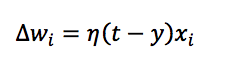
- 但是对于各个隐藏层的节点来说，不存在已知的期望输出（只有到输出层才会有期望输出结果），因而该学习规则不能用于隐藏 层的权值调整。
    - 在感知器中，我们是通过输出层的输出的期望值来调整输入层每一个神经元中的w


### 原理概述
- BP 算法的基本思想是，学习过程由信号的正向传播和误差的反向传播两个过程组成。
    - 正向传播时，把样本的特征从输入层进行输入，信号经过各个隐藏层逐层处理后，最后从 输出层传出。
    - 对于网络的实际输出与期望输出之间的误差，把误差信号从最后一层逐层反传， 从而获得各个层的误差学习信号，再根据误差学习信号来修正各个层神经元的权值。
- 这种信号正向传播与误差反向传播，然后各个层调整权值的过程是周而复始地进行的。权值不断调整的过程，也就是网络学习训练的过程。进行此过程直到网络输出误差减小到最小误差/损失（梯度下降），或者是超过预先设置的最大训练次数。

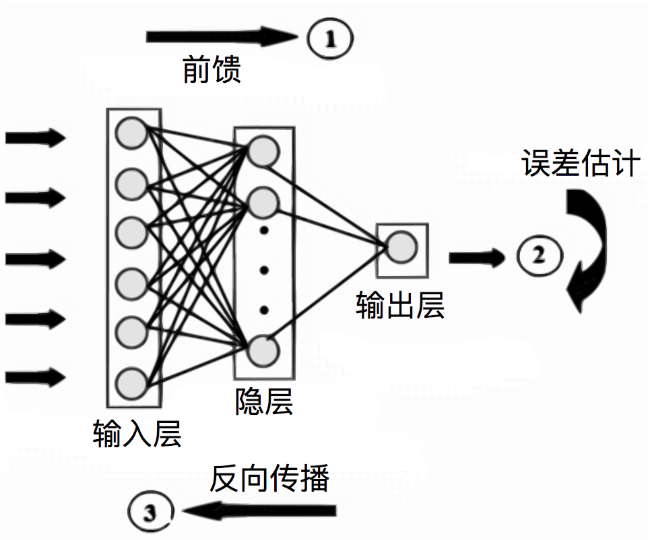

假设我们有这样一个网络层：
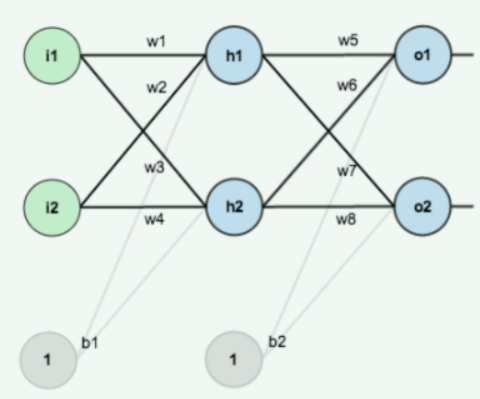

第一层是输入层，包含两个神经元i1，i2，和截距项b1；

第二层是隐含层，包含两个神经元h1,h2和截距项b2

第三层是输出o1,o2，每条线上标的wi是层与层之间连接的权重，激活函数我们默认为sigmoid函数。

现在对他们赋上初值，如下图：
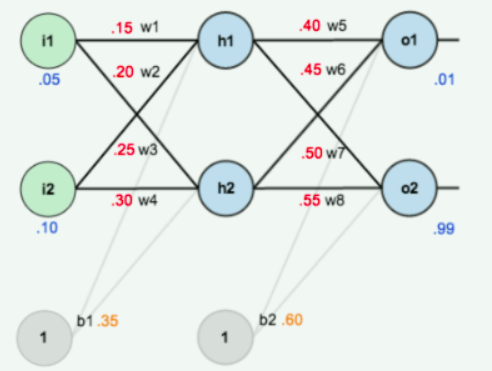

其中，输入数据 i1=0.05，i2=0.10;

期望输出数据 o1=0.01,o2=0.99;

初始权重 w1=0.15,w2=0.20,w3=0.25,w4=0.30;w5=0.40,w6=0.45,w7=0.50,w8=0.55

##### 目标：给出输入数据i1,i2(0.05和0.10)，使输出尽可能与原始输出o1,o2(0.01和0.99)接近。



##### 实现整体流程

#### Step 1 前向传播



- 计算神经元h1的输入加权和：
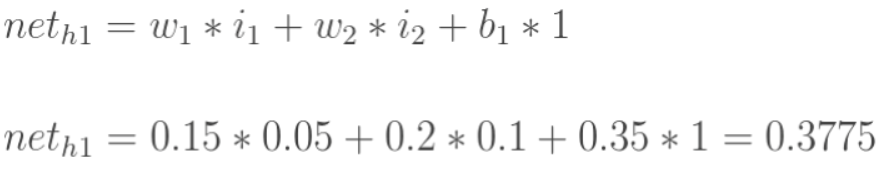

- 神经元h1的输出o1:(此处用到激活函数为sigmoid函数)：
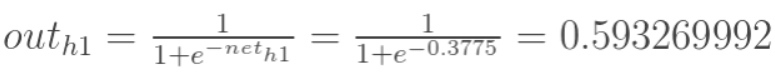

- 同理，可计算出神经元h2的输出o2：
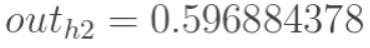

- 计算输出层神经元o1和o2的值：
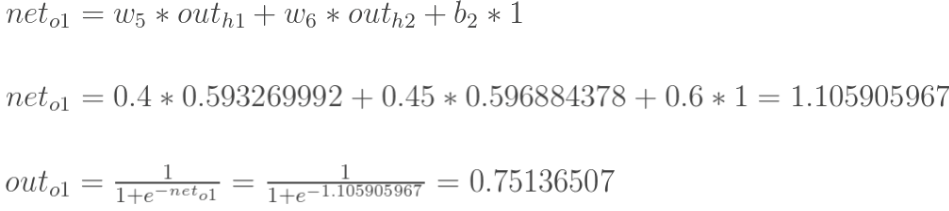

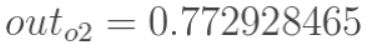

这样前向传播的过程就结束了，我们得到输出值为[0.75136079 , 0.772928465]，与实际值[0.01 , 0.99]相差还很远，现在我们对误差进行反向传播，更新权值，重新计算输出。

#### Step 2 反向传播



- 计算总误差：总误差：(square error)
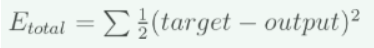
    - 但是有两个输出，所以分别计算o1和o2的误差，总误差为两者之和：

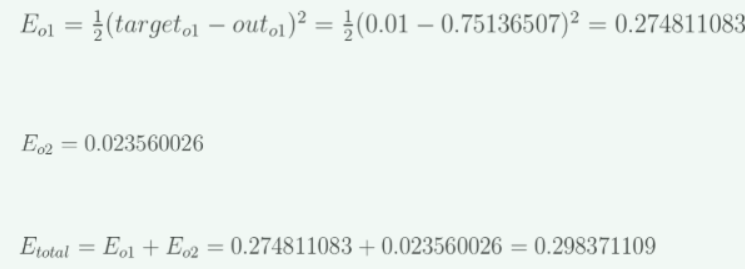

- 隐含层到输出层的权值更新
    - 以权重参数w5为例，如果我们想知道w5对整体误差产生了多少影响，可以用整体误差对w5求偏导求出
    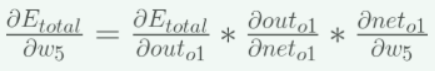
        - 然后使用w5对整体误差产生的影响来调整w5

同理可以更新其他的w，这样误差反向传播法就完成了，最后我们再把更新的权值重新计算，不停地迭代。

### 梯度下降
- 损失函数：
    - 损失函数也可以被称为代价函数，英文称为 loss function 或 cost function，有些地方我们会看到使用 loss 表示代价函数的值，有些地方我们会看到用 cost 表示代价函数的值。
    - 代价函数并没有准确的定义，一般我们可以理解为是一个人为定义的函数，我们可以利用这个函数来优化模型的参数。最简单常见的一个代价函数是均方差(Mean-Square Error, MSE)代价函数。
    - 优化模型的损失或者代价通常我们使用梯度下降的方式且在求解机器学习算法的模型参数时，梯度下降法是最常用的方法之一。在学习梯度下降法 之前我们先来了解一下导数、偏导数、方向导数和梯度的概念。

- 导数：是微积分学中重要的基础概念。一个函数在某一点的导数描述了这个函数在这一点附近的变化率。
    - 导数的概念就下图所示：
    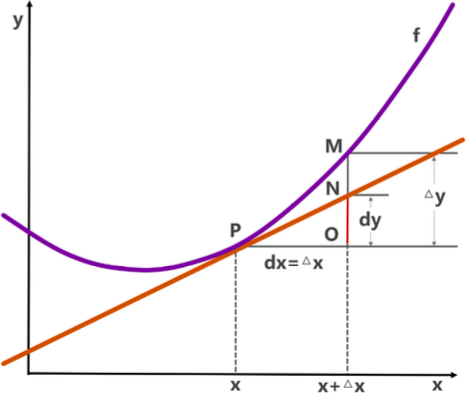

- 导数的定义如下: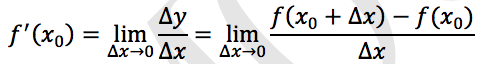
    - 𝑓‘(𝑥0)表示函数 f 在 x0 处的导数，𝛥𝑥表示 x 的变化量
    - 𝛥𝑦: 𝑓(𝑥0 + 𝛥𝑥) − 𝑓(𝑥0)表示函数的增量
    - 𝑙𝑖𝑚 表示𝛥𝑥趋近于 0
    - dx表示x的变化量𝛥𝑥趋近于0
    - 总结：
        - 公式其实表示的就是y的差值𝛥𝑦(三角形的对边)/x的差值𝛥𝑥（三角形的临边），返回的就是tan a，a这个角就是曲线的切线斜率。
        - 𝑓’(𝑥0)反映的是函数𝑦 = 𝑓(𝑥)在 x 轴上某一点处沿 x 轴正方向的变化率/变化趋势。也就是在 x 轴上的某一点，如果𝑓′(𝑥)>0，说明𝑓(𝑥)的函数值在 x 点沿 x 轴正方向是趋 向于增加的;如果𝑓′(𝑥) < 0，说明𝑓(𝑥)的函数值在 x 点沿 x 轴正方向是趋向于减小的。

- 注意：一阶导数为0,可能是一条平行于x轴的直线

- 偏导数的定义如下：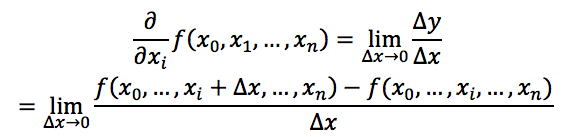
    - 可以看到，导数与偏导数本质是一致的，都是当自变量的变化量趋近于 0 时，函数值的 变化量与自变量变化量比值的极限。直观地说，偏导数也就是函数在某一点上沿坐标轴正方向的变化率。
 

- 导数和偏导数的区别：
    - 导数，指的是一元函数中，函数𝑦 = 𝑓(𝑥)在某一点处沿 x 轴正方向的变化率; 
    - 偏导数，指的是多元函数中，函数𝑦 = 𝑓(𝑥0, 𝑥1, ... , 𝑥n)在某一点处沿某一坐标轴(𝑥0,𝑥1,...,𝑥n)正方向的变化率。

- 方向导数的定义如下：在函数定义域的内点，对某一方向求导得到的导数
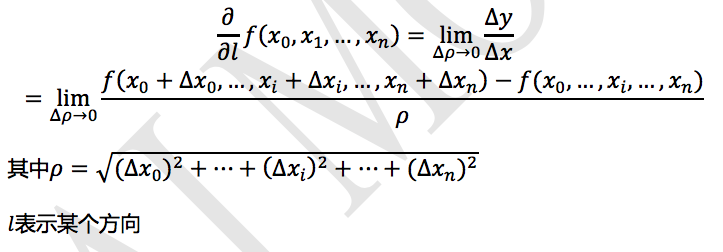
    - 在前面导数和偏导数的定义中，均是沿坐标轴正方向讨论函数的变化率。那么当我们讨论函数沿任意方向的变化率时，也就引出了方向导数的定义，即:某一点在某一趋近方向上的导数值。
    - 通俗的解释是:我们不仅要知道函数在坐标轴正方向上的变化率(即偏导数)，而且还要设法求得函数在其他特定方向上的变化率。而方向导数就是函数在其他特定方向上的变化率。

- 梯度的定义如下：
    - 对于𝑓(𝑥0,...,𝑥i,...,𝑥n)上的某一点来说存在很多个方向导数，梯度的方向是函数𝑓(𝑥0, ... , 𝑥i, ... , 𝑥n)在某一点增长最快的方向.
    

- 梯度下降法:
    - 我们已经知道代价函数的值越小，说明模型的预测值越接近真实标签的值。
    - 代价函数中的预测值 y 是跟神经网络中的参数 w 和 b 相关的。我们可以先考虑 一个简单的情况，假如神经网络只有一个参数 w，参数 w 与代价函数 loss 的关系如图所示：
    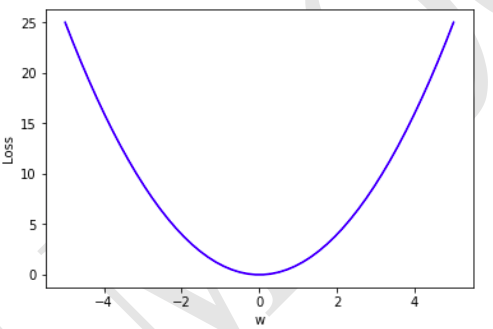
    - 既然在变量空间的某一点处，函数沿梯度方向具有最大的变化率（我们相信最大梯度就是损失降低的方向），那么在优化代价函数的时候，就可以沿着负梯度方向去减小代价函数的值。
    
    

### 常用激活函数
- 神经网络的激活函数其实有很多种，在前面的章节中我们介绍过一种激活函数，sign 函数。sign 函数也称为符号函数，因为 sign(x)中 x>0，函数结果为 1;sign(x) 中 x<0，函数结果为-1。这种激活函数在处理复杂非线性问题的时候都不能得到很好的结果。下面我们介绍几个在 BP 神经网络中常用的非线性激活函数，sigmoid 函数，tanh 函数，softsign 函数和 ReLU 函数，使用这些非线性激活函数可以帮助我们解决复杂的非线性问题。
    

- sigmoid 函数
    - sigmoid 函数 —— sigmoid 函数也称为逻辑函数(logical function)，函数的公式为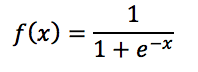
    - 我们可以得出函数的取值范围是 0-1 之间，当 x 趋向于-∞的时候函数值趋向于 0;当 x 趋向于+∞的时候函数值趋向于 1。

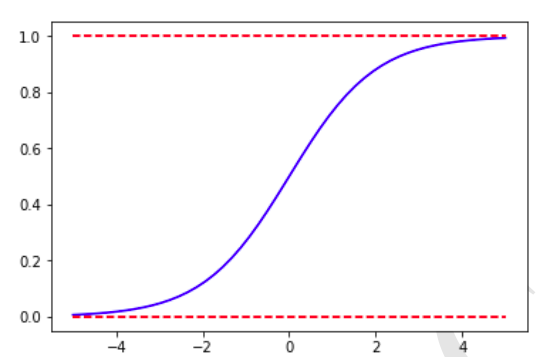

- tanh 函数
    - tanh 函数也称为双曲正切函数，函数的公式为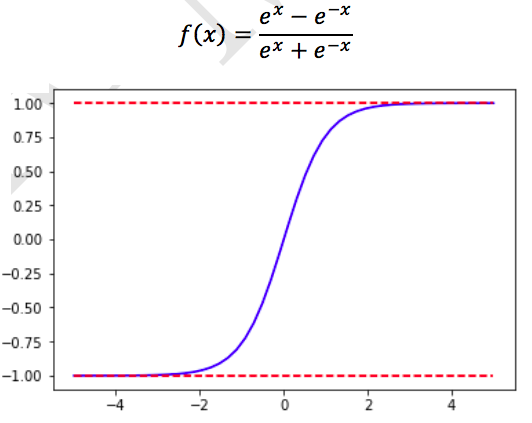
    - 图中我们可以看出函数的取值范围是-1-1 之间，当 x 趋向于-∞的时候函数值趋向于-1; 当 x 趋向于+∞的时候函数值趋向于 1。

- softsign 函数
    - softsign 函数的公式为: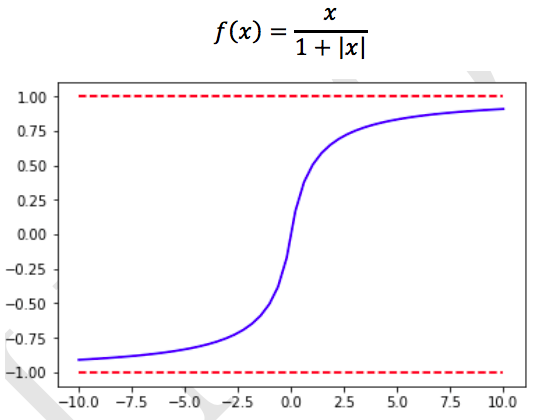
    - 图中我们可以看出函数的取值范围是-1-1 之间，当 x 趋向于-∞的时候函数值趋向于-1;当 x 趋向于+∞的时候函数值趋向于 1。

- 我们可以通过下图对比一下这三种函数的区别：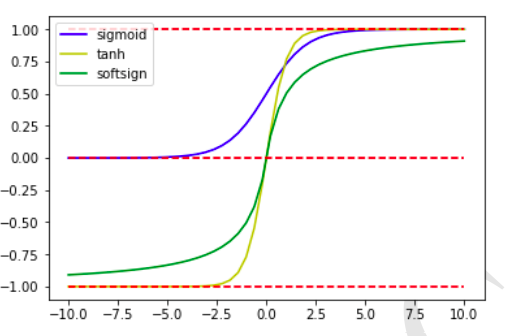
    - 它们这三个激活函数都是 S 形函数，形状相似，只不过 sigmoid 函数取值范围是 0-1 之间，tanh 函数和 softsign 函数取值范围是-1-1 之间。我们还可以观察到 softsign 函数相对 于 tanh 函数而言过渡更加平滑，在 x 等于 0 附近函数的数值改变更缓慢。


- ReLU 函数
    - 该函数是模拟生物神经元的激活函数设计出来的一个人工神经网络激活函数。下图为生物神经元放电曲线图。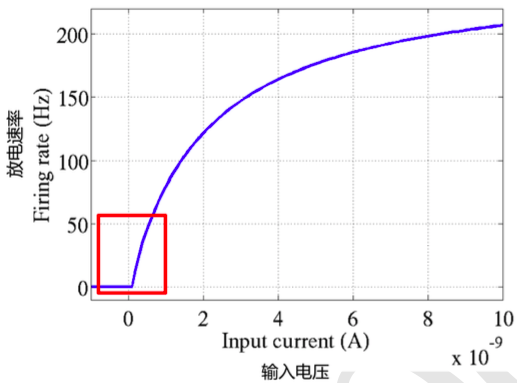
    - 图中可以看到当输入电压不足时，生物神经元放电为 0，电压达到一定的阈值以后生物神经元才会开始放电，并且放电速率跟输入电压成正相关关系。

- ReLU(The Rectified Linear Unit)函数的公式为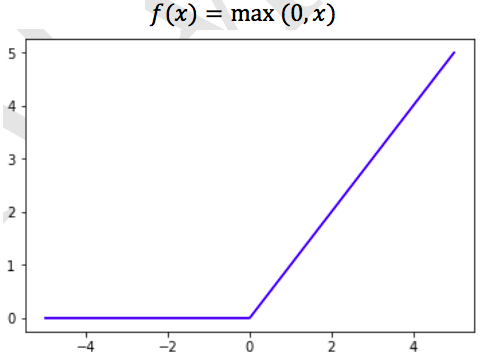
    - 当 x 小于 0 时，y 等于 0。当 x 大于 0 时，y 等于 x。
    - ReLU 的中文名称是校正线性单元，虽然在 x 小于 0 时函数是线性的，x 大于 0 时函数也是线性的，但是组合起来之后，函 数就具有了非线性的特征。

- 上述四种激活函数的非线性的特征是怎么体现的呢，我们可以观察下面的一系列图片：


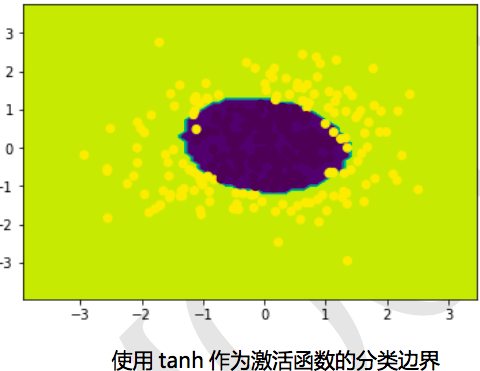

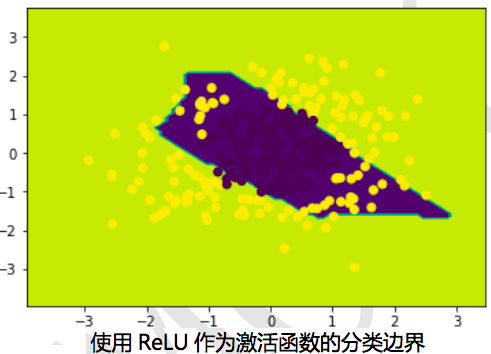
- 我们可以发现 ReLU 激活函数所描绘出来的边界其实是一条一条的直线构成的，不存在曲线。

- 另外我们再来看一下 ReLU 应用于回归预测时的特点
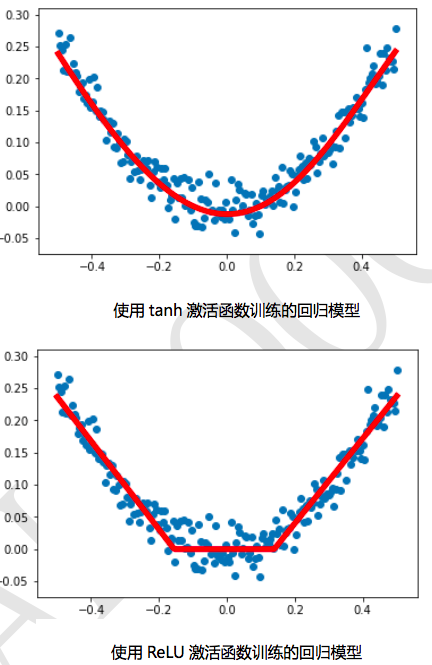
    - 我们发现了跟分类中类似的情况，tanh 激活函数得到的回归线是一条曲线，而 ReLU 激
活函数得到的是由一段一段直线构成的回归线
    

- softmax
    - Softmax从字面上来说，可以分成soft和max两个部分。max故名思议就是最大值的意思。Softmax的核心在于soft，而soft有软的含义，与之相对的是hard硬。很多场景中需要我们找出数组所有元素中值最大的元素，实质上都是求的hardmax。下面使用Numpy模块以及TensorFlow深度学习框架实现hardmax。
    - 通过上面的例子可以看出hardmax最大的特点就是只选出其中一个最大的值，即非黑即白。但是往往在实际中这种方式是不合情理的，比如对于文本分类来说，一篇文章或多或少包含着各种主题信息，我们更期望得到文章对于每个可能的文本类别的概率值（置信度），可以简单理解成属于对应类别的可信度。所以此时用到了soft的概念，Softmax的含义就在于不再唯一的确定某一个最大值，而是为每个输出分类的结果都赋予一个概率值，表示属于每个类别的可能性。
    - Softmax函数的定义（以第i个节点输出为例）：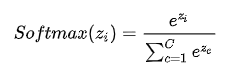
        - 其中 [公式] 为第i个节点的输出值，C为输出节点的个数，即分类的类别个数。通过Softmax函数就可以将多分类的输出值转换为范围在[0, 1]和为1的概率分布。